# Decision Tree

In [24]:
# import dataset without foreign schools and missing data
df = pd.read_csv(r'../data/modeling/combined.csv', encoding = "ISO-8859-1")
df.columns

<IPython.core.display.Javascript object>

Index(['opeid', 'agemedian', 'cdr2014_log', 'cdr2015_log', 'cdr2016_log',
       'cohort2014_log', 'cohort2015_log', 'cohort2016_log', 'density_log',
       'educationcollegeorabove', 'familysize_log', 'female_sqrt',
       'homeownership', 'homevalue_log', 'incomehouseholdmedian_log',
       'incomehouseholdsixfigure_log', 'laborforceparticipation_sqrt',
       'male_reciprocal', 'married', 'population_log', 'proglength',
       'raceasian_log', 'raceblack_log', 'racemultiple_log',
       'racenative_reciprocal', 'raceother_log', 'racepacific', 'racewhite',
       'rentmedian_log', 'unemploymentrate_log', 'associates', 'bachelors',
       'firstprofessional', 'gradprofessional', 'mastersordoctors',
       'nondegree', 'nondegree1year', 'nondegree2years', 'nondegree3years',
       'private', 'proprietary', 'public', 'hbcuCollege', 'hispanicCollege',
       'nativeAmericanCollege', 'notReportedCollege'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split

data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log']]
# data = df.drop(columns = 'proprietary')
target = df['proprietary']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 109)

## predict school type proprietary

### training set

In [26]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

In [27]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_train, y_pred))

print("precision:",metrics.precision_score(y_train, y_pred))

print("recall:",metrics.recall_score(y_train, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_train, y_pred))

accuracy:  0.8971407352395099
precision: 1.0
recall: 0.6793981481481481
kappa: 0.7421681200135352


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

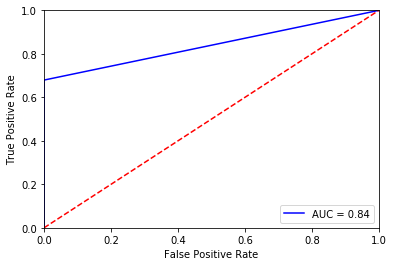

In [28]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### test set

In [29]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [30]:

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

print("precision:",metrics.precision_score(y_test, y_pred))

print("recall:",metrics.recall_score(y_test, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_test, y_pred))

accuracy:  0.9120267260579065
precision: 1.0
recall: 0.7237762237762237
kappa: 0.7812525053189849


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

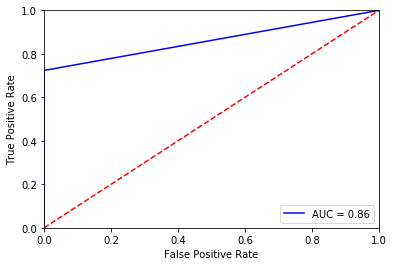

In [31]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### cross validation

[1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          2441     0  2441
1             0  1150  1150
All        2441  1150  3591
accuracy:  1.0
precision: 1.0
recall: 1.0
kappa: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

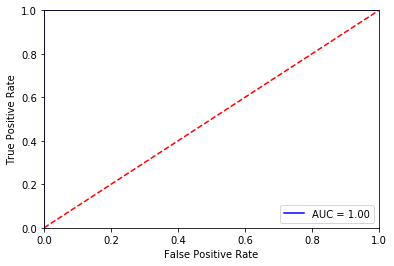

1.0


In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y = df.proprietary
model = clf

scores = cross_val_score(model, df, y, cv=6)
print(scores)

predictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, predictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, predictions))

print("precision:",metrics.precision_score(y, predictions))

print("recall:",metrics.recall_score(y, predictions))

print("kappa:",metrics.cohen_kappa_score(y, predictions))

fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)

## predict high cdr

In [33]:
df['cdrHigh'] = [1 if x >= 0.536775872 else 0 for x in df.cdr2016_log]

In [34]:
from sklearn.model_selection import train_test_split

data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log', 'proprietary']]
# data = df.drop(columns = 'cdrHigh')
target = df['cdrHigh']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 109)

In [35]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 10)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [36]:

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

print("precision:",metrics.precision_score(y_test, y_pred))

print("recall:",metrics.recall_score(y_test, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_test, y_pred))

accuracy:  0.8663697104677061
precision: 0.8859223300970874
recall: 0.8333333333333334
kappa: 0.7321987733232602


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

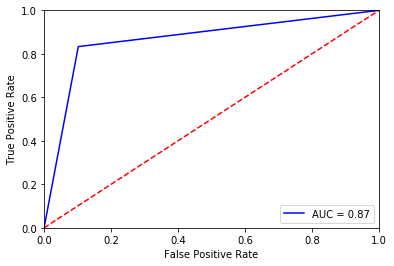

In [37]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### cross validation

[1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          1795     0  1795
1             0  1796  1796
All        1795  1796  3591
accuracy:  1.0
precision: 1.0
recall: 1.0
kappa: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

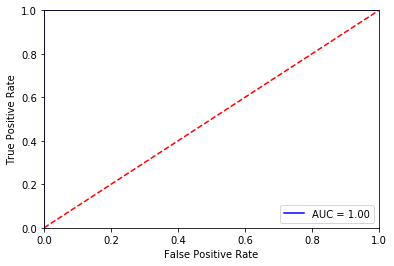

1.0


In [38]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y = df.cdrHigh
model = clf

scores = cross_val_score(model, df, y, cv=6)
print(scores)

predictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, predictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, predictions))

print("precision:",metrics.precision_score(y, predictions))

print("recall:",metrics.recall_score(y, predictions))

print("kappa:",metrics.cohen_kappa_score(y, predictions))

fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)